In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from uncertainties import unumpy as unp
from uncertainties import ufloat

import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern, Latin Modern Roman, Bitstream Vera Serif'
mpl.rcParams['text.usetex'] = True

import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
basedir = '/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/data/l3/bwd_2'
e_cfg = [1, 2, 4, 6, 8]
pi_cfg = [4, 6, 8, 25]

E_DATA = {}
for cfg in e_cfg:
    E_DATA[cfg] = basedir + '/{0}GeV_e.hd5'.format(cfg)

PI_DATA = {}
for cfg in pi_cfg:
    PI_DATA[cfg] = basedir + '/{0}GeV_pi.hd5'.format(cfg)

In [4]:
E_DF = {}
for cfg in e_cfg:
    store = pd.HDFStore(E_DATA[cfg])
    E_DF[cfg] = store['df']
    store.close()

PI_DF = {}
for cfg in pi_cfg:
    store = pd.HDFStore(PI_DATA[cfg])
    PI_DF[cfg] = store['df']
    store.close()

In [5]:
e_var_dict = {}
for cfg in e_cfg:
    e_var_dict[cfg] = []
    df = E_DF[cfg]
    for idx in xrange(df['index'].max() + 1):
        mask_idx = df['index'] == idx
        wv = df[mask_idx]
        mu = wv['gauss_mu'].unique()
        sigma = wv['gauss_sigma'].unique()
        assert len(mu) == 1
        assert len(sigma) == 1
        mu = mu[0]
        sigma = sigma[0]
        if (mu>100) & (mu<150) & (sigma>2.5) & (sigma<15):
            av_var = sigma# / mu
            e_var_dict[cfg].append(av_var)

e_var = [ufloat(np.mean(e_var_dict[cfg]), np.std(e_var_dict[cfg])) for cfg in e_cfg]

print 'e_var', e_var

e_var [8.186834348815271+/-1.0773888779942877, 8.058590177383211+/-0.9865022418206951, 8.520048570458675+/-1.1020122606743767, 9.812487218359198+/-1.7170584726386997, 10.776457507114669+/-1.497859785895262]


In [6]:
pi_var_dict = {}
for cfg in pi_cfg:
    pi_var_dict[cfg] = []
    df = PI_DF[cfg]
    for idx in xrange(df['index'].max() + 1):
        mask_idx = df['index'] == idx
        wv = df[mask_idx]
        mu = wv['gauss_mu'].unique()
        sigma = wv['gauss_sigma'].unique()
        assert len(mu) == 1
        assert len(sigma) == 1
        mu = mu[0]
        sigma = sigma[0]
        if (mu>100) & (mu<150) & (sigma>2.5) & (sigma<15):
            av_var = sigma# / mu
            pi_var_dict[cfg].append(av_var)

pi_var = [ufloat(np.mean(pi_var_dict[cfg]), np.std(pi_var_dict[cfg])) for cfg in pi_cfg]

print 'pi_var', pi_var

pi_var [7.51469455354156+/-0.8415478489931975, 7.002159774717059+/-0.8238799679963874, 6.972011621895499+/-0.9569527444539776, 8.030379932209032+/-1.3964587906486445]


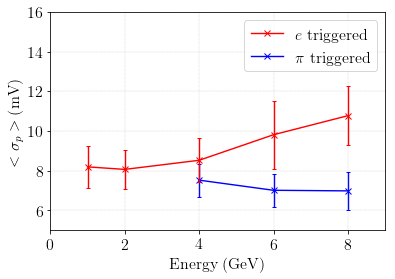

In [8]:
fontsize = 16

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.set_xlim(0, 9)
#ax.set_ylim(0.04, 0.12)
ax.set_ylim(5, 16)

for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=1, linewidth=0.3)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=1, linewidth=0.3)

ax.set_xlabel(r'Energy (GeV)', fontsize=fontsize)
#ax.set_ylabel(r'$<\sigma_p\:/\:\mu_p>\:$', fontsize=fontsize)
ax.set_ylabel(r'$<\sigma_p>\left({\rm mV}\right)$', fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

x = e_cfg
y = e_var
ax.plot(x, unp.nominal_values(y), marker='x', color='red',
          linewidth=1.4, label=r'$e$ triggered', zorder=4)
ax.errorbar(
    x, unp.nominal_values(y), color='red', xerr=0, yerr=unp.std_devs(y),
    capsize=1.6, alpha=1, linestyle='None', markersize=2, linewidth=1.4, zorder=4
)

x = pi_cfg[:-1]
y = pi_var[:-1]
ax.plot(x, unp.nominal_values(y), marker='x', color='blue',
          linewidth=1.4, label=r'$\pi$ triggered')
ax.errorbar(
    x, unp.nominal_values(y), color='blue', xerr=0, yerr=unp.std_devs(y),
    capsize=1.6, alpha=1, linestyle='None', markersize=2, linewidth=1.4
)

ax.legend(loc='upper right', prop={'size': fontsize})

fig.savefig('./images/saturation.pdf', bbox_inches='tight', dpi=150)